# Imports


In [38]:
# import sys
# sys.path.append('../')

import os
os.chdir('../src')

from matplotlib.lines import Line2D
from src.local_score import LocalMetric
import numpy as np
from umap import UMAP
import seaborn as sns
from typing_extensions import Literal
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import warnings
import pickle
from utils import *
from jarvis_patrick import JP
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import importlib
import centroids

importlib.reload(src.centroids)
from centroids import compute_centroids, measure_distances, tsne_algorithms, tsne_clean, umap_algorithms, umap_clean
from local_score import *

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

# Dataset

In [39]:
from keras.datasets import fashion_mnist

(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()

train_images, _, train_labels, _ = train_test_split(X_train_full, y_train_full, train_size=0.1, random_state=42)
test_images, _, test_labels, _ = train_test_split(X_test_full, y_test_full, train_size=0.1, random_state=42)

In [40]:
print(train_images.shape)
print(test_images.shape)
X_train = train_images.reshape(train_images.shape[0], -1)
X_test = test_images.reshape(test_images.shape[0], -1)
print(X_train.shape)
print(X_test.shape)

(6000, 28, 28)
(1000, 28, 28)
(6000, 784)
(1000, 784)


In [41]:
y_train, y_test= train_labels, test_labels

In [42]:
n_centroids=[10, 30, 70]

# k-means + UMAP


Original F-MNIST + UMAP

In [43]:
fmnist_umap = UMAP(n_components = 2, random_state=42).fit_transform(X_train)
umap_metrics_kmeans = LocalMetric()
umap_metrics_kmeans.calculate_knn_gain_and_dr_quality(
        X_lds=fmnist_umap,
        X_hds=X_train,
        labels=y_train,
        method_name="{} {}".format("umap", "clean"),
    )

Calculating d_hd
umap clean


Global centroids

In [44]:
kmeans_global_centroids = {}
kmeans_global_labels = {}

for n in n_centroids:
    centroids, cluster_labels = compute_centroids("kmeans", "global", X_train, y_train, 0, n)
    kmeans_global_centroids[n] = centroids
    kmeans_global_labels[n] = cluster_labels

Local centroids

In [45]:
kmeans_local_centroids = {}
kmeans_local_labels = {}

for n in n_centroids:
    centroids, cluster_labels = compute_centroids("kmeans", "local", X_train, y_train, int(n/10), 0)
    kmeans_local_centroids[int(n/10)] = centroids
    kmeans_local_labels[int(n/10)] = cluster_labels

In [46]:
kmeans_global_distances={}
kmeans_local_distances={}
for n in n_centroids:
    kmeans_global_distances[n] = measure_distances(X_test, kmeans_global_centroids[n], "kmeans", "global", n, "euclidean")
    kmeans_local_distances[int(n/10)] = measure_distances(X_test, kmeans_local_centroids[int(n/10)], "kmeans", "local", n, "euclidean")

In [47]:
for n in n_centroids:
    kmeans_umap_global = UMAP(n_components = 2, random_state=42).fit_transform(kmeans_global_distances[n])
    umap_metrics_kmeans.calculate_knn_gain_and_dr_quality(
        X_lds=kmeans_umap_global,
        X_hds=X_test,
        labels=y_test,
        method_name="{} {}".format("umap + kmeans global ", f"{n} centroids"),
    )

Calculating d_hd
umap + kmeans global  10 centroids
Calculating d_hd
umap + kmeans global  30 centroids
Calculating d_hd
umap + kmeans global  70 centroids


In [48]:
for n in n_centroids:
    kmeans_umap_local = UMAP(n_components = 2, random_state=42).fit_transform(kmeans_local_distances[int(n/10)])
    umap_metrics_kmeans.calculate_knn_gain_and_dr_quality(
        X_lds=kmeans_umap_local,
        X_hds=X_test,
        labels=y_test,
        method_name="{} {}".format("umap + kmeans local ", f"{n} centroids"),
    )

Calculating d_hd
umap + kmeans local  10 centroids
Calculating d_hd
umap + kmeans local  30 centroids
Calculating d_hd
umap + kmeans local  70 centroids


Finished.


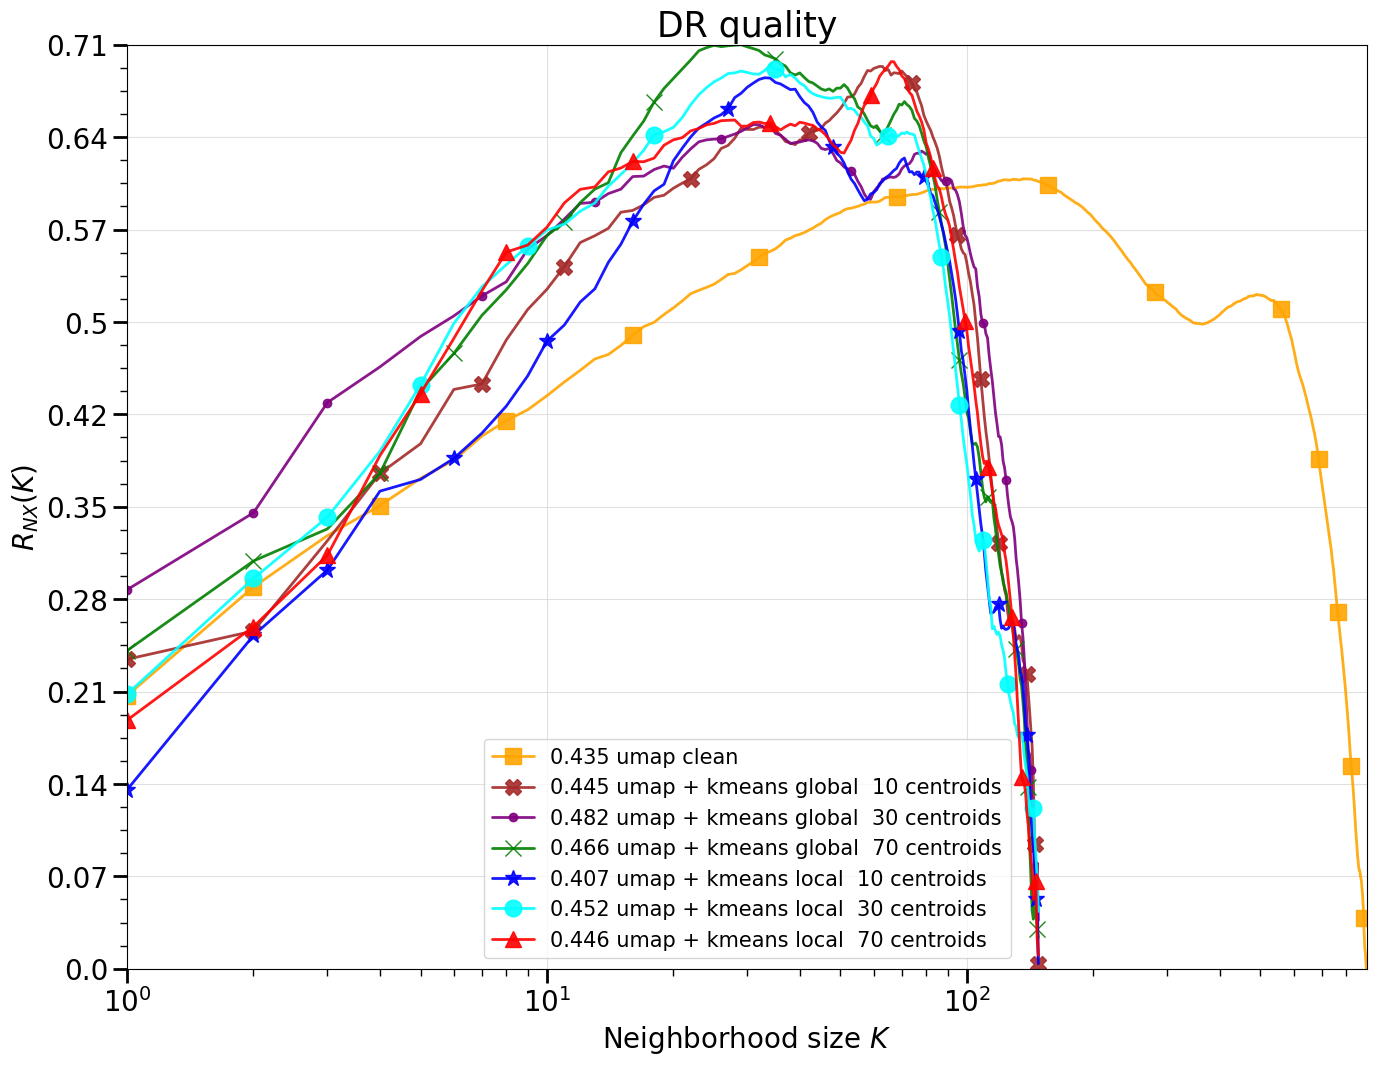

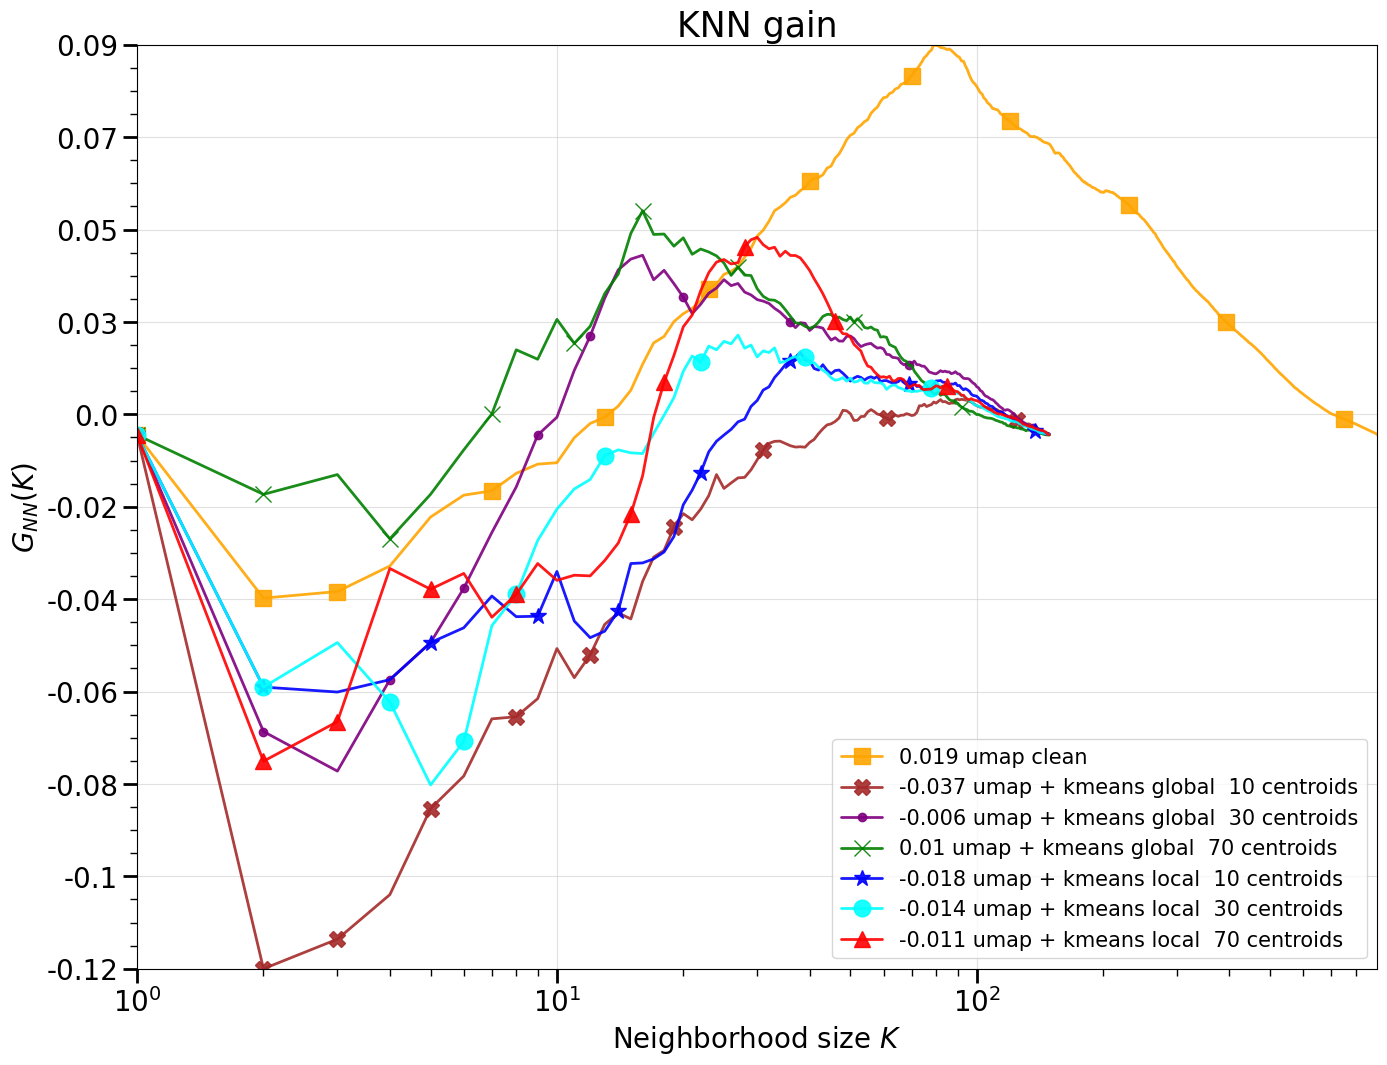

In [49]:
umap_metrics_kmeans.visualize()

# Agglomerative + UMAP

Original F-MNIST + UMAP

In [50]:
fmnist_umap = UMAP(n_components = 2, random_state=42).fit_transform(X_train)
umap_metrics_agglomerative = LocalMetric()
umap_metrics_agglomerative.calculate_knn_gain_and_dr_quality(
        X_lds=fmnist_umap,
        X_hds=X_train,
        labels=y_train,
        method_name="{} {}".format("umap", "clean"),
    )

Calculating d_hd
umap clean


Global centroids

In [51]:
agglomerative_global_centroids = {}
agglomerative_global_labels = {}

for n in n_centroids:
    centroids, cluster_labels = compute_centroids("agglomerative", "global", X_train, y_train, 0, n)
    agglomerative_global_centroids[n] = centroids
    agglomerative_global_labels[n] = cluster_labels

Local centroids

In [52]:
agglomerative_local_centroids = {}
agglomerative_local_labels = {}

for n in n_centroids:
    centroids, cluster_labels = compute_centroids("agglomerative", "local", X_train, y_train, int(n/10), 0)
    agglomerative_local_centroids[int(n/10)] = centroids
    agglomerative_local_labels[int(n/10)] = cluster_labels

In [53]:
agglomerative_global_distances={}
agglomerative_local_distances={}
for n in n_centroids:
    agglomerative_global_distances[n] = measure_distances(X_test, agglomerative_global_centroids[n], "agglomerative", "global", n, "euclidean")
    agglomerative_local_distances[int(n/10)] = measure_distances(X_test, agglomerative_local_centroids[int(n/10)], "agglomerative", "local", n, "euclidean")

In [54]:
for n in n_centroids:
    umap_agglomerative_global = UMAP(n_components = 2, random_state=42).fit_transform(agglomerative_global_distances[n])
    umap_metrics_agglomerative.calculate_knn_gain_and_dr_quality(
        X_lds=umap_agglomerative_global,
        X_hds=X_test,
        labels=y_test,
        method_name="{} {}".format("umap + agglomerative global ", f"{n} centroids"),
    )

Calculating d_hd
umap + agglomerative global  10 centroids
Calculating d_hd
umap + agglomerative global  30 centroids
Calculating d_hd
umap + agglomerative global  70 centroids


In [55]:
for n in n_centroids:
    umap_agglomerative_local= UMAP(n_components = 2, random_state=42).fit_transform(agglomerative_local_distances[int(n/10)])
    umap_metrics_agglomerative.calculate_knn_gain_and_dr_quality(
        X_lds=umap_agglomerative_local,
        X_hds=X_test,
        labels=y_test,
        method_name="{} {}".format("umap + agglomerative global ", f"{n} centroids"),
    )

Calculating d_hd
umap + agglomerative global  10 centroids
Calculating d_hd
umap + agglomerative global  30 centroids
Calculating d_hd
umap + agglomerative global  70 centroids


Finished.


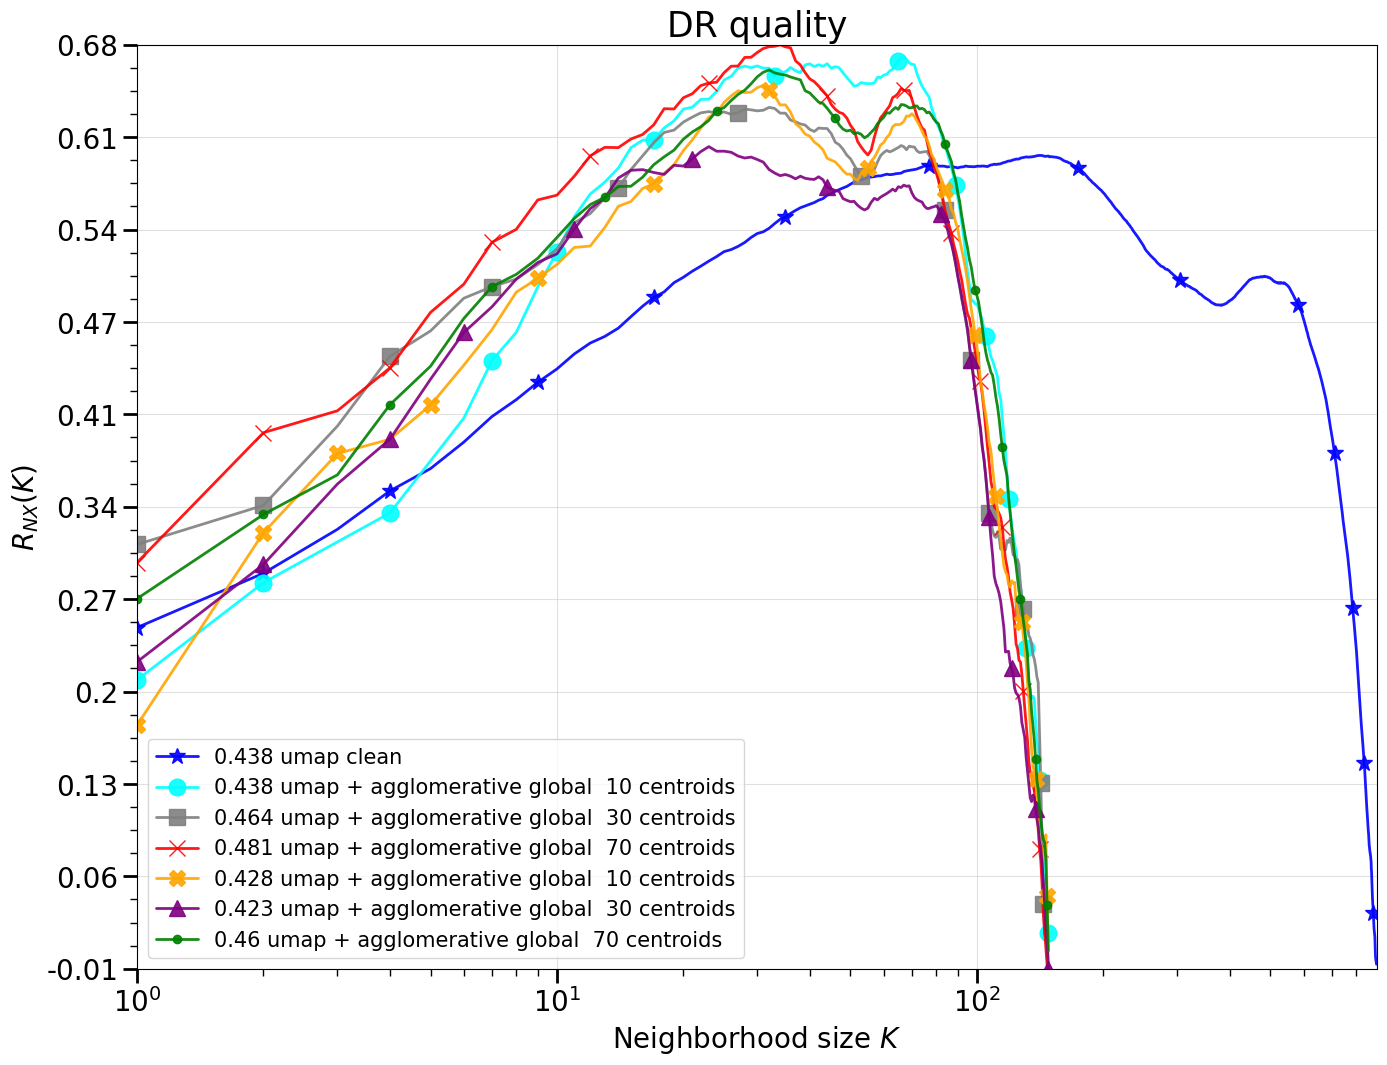

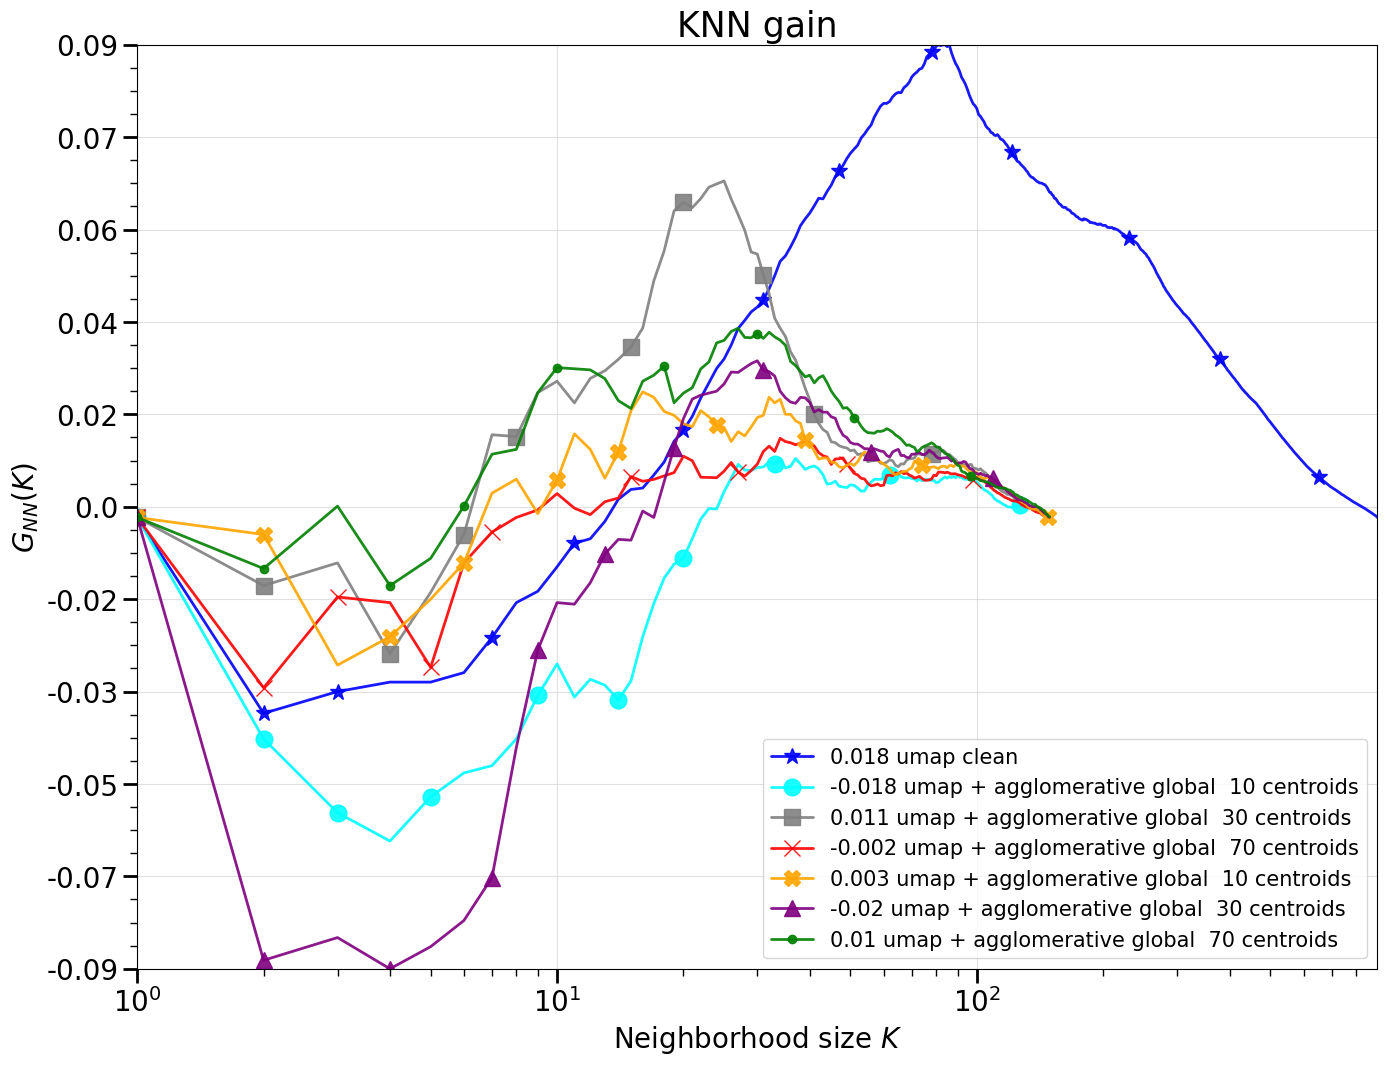

In [56]:
umap_metrics_agglomerative.visualize()

# DBSCAN + UMAP

Original F-MNIST + UMAP

In [57]:
fmnist_umap = UMAP(n_components = 2, random_state=42).fit_transform(X_train)
umap_metrics_dbscan = LocalMetric()
umap_metrics_dbscan.calculate_knn_gain_and_dr_quality(
        X_lds=fmnist_umap,
        X_hds=X_train,
        labels=y_train,
        method_name="{} {}".format("umap", "clean"),
    )

Calculating d_hd
umap clean


Global centroids

In [58]:
dbscan_global_centroids, dbscan_global_labels=compute_centroids("dbscan", "global", X_train, y_train, 0, 1, epsilon=1100, min_samples=40)

Local centroids

In [59]:
dbscan_local_centroids, dbscan_local_labels=compute_centroids("dbscan", "local", X_train, y_train, epsilon=1100, min_samples=40)

In [60]:
dbscan_global_distances = measure_distances(X_test, dbscan_global_centroids, "dbscan", "global", 10,"euclidean")
dbscan_local_distances = measure_distances(X_test, dbscan_local_centroids, "dbscan", "local", 10,"euclidean")

In [61]:
dbscan_umap_global = UMAP(n_components=2, random_state=42).fit_transform(dbscan_global_distances)
umap_metrics_dbscan.calculate_knn_gain_and_dr_quality(
        X_lds=dbscan_umap_global,
        X_hds=X_test,
        labels=y_test,
        method_name="{} {}".format("umap + dbscan ", "global"),
    )

Calculating d_hd
umap + dbscan  global


In [62]:
dbscan_umap_local = UMAP(n_components=2, random_state=42).fit_transform(dbscan_local_distances)
umap_metrics_dbscan.calculate_knn_gain_and_dr_quality(
        X_lds=dbscan_umap_local,
        X_hds=X_test,
        labels=y_test,
        method_name="{} {}".format("umap + dbscan ", "local"),
    )

Calculating d_hd
umap + dbscan  local


Finished.


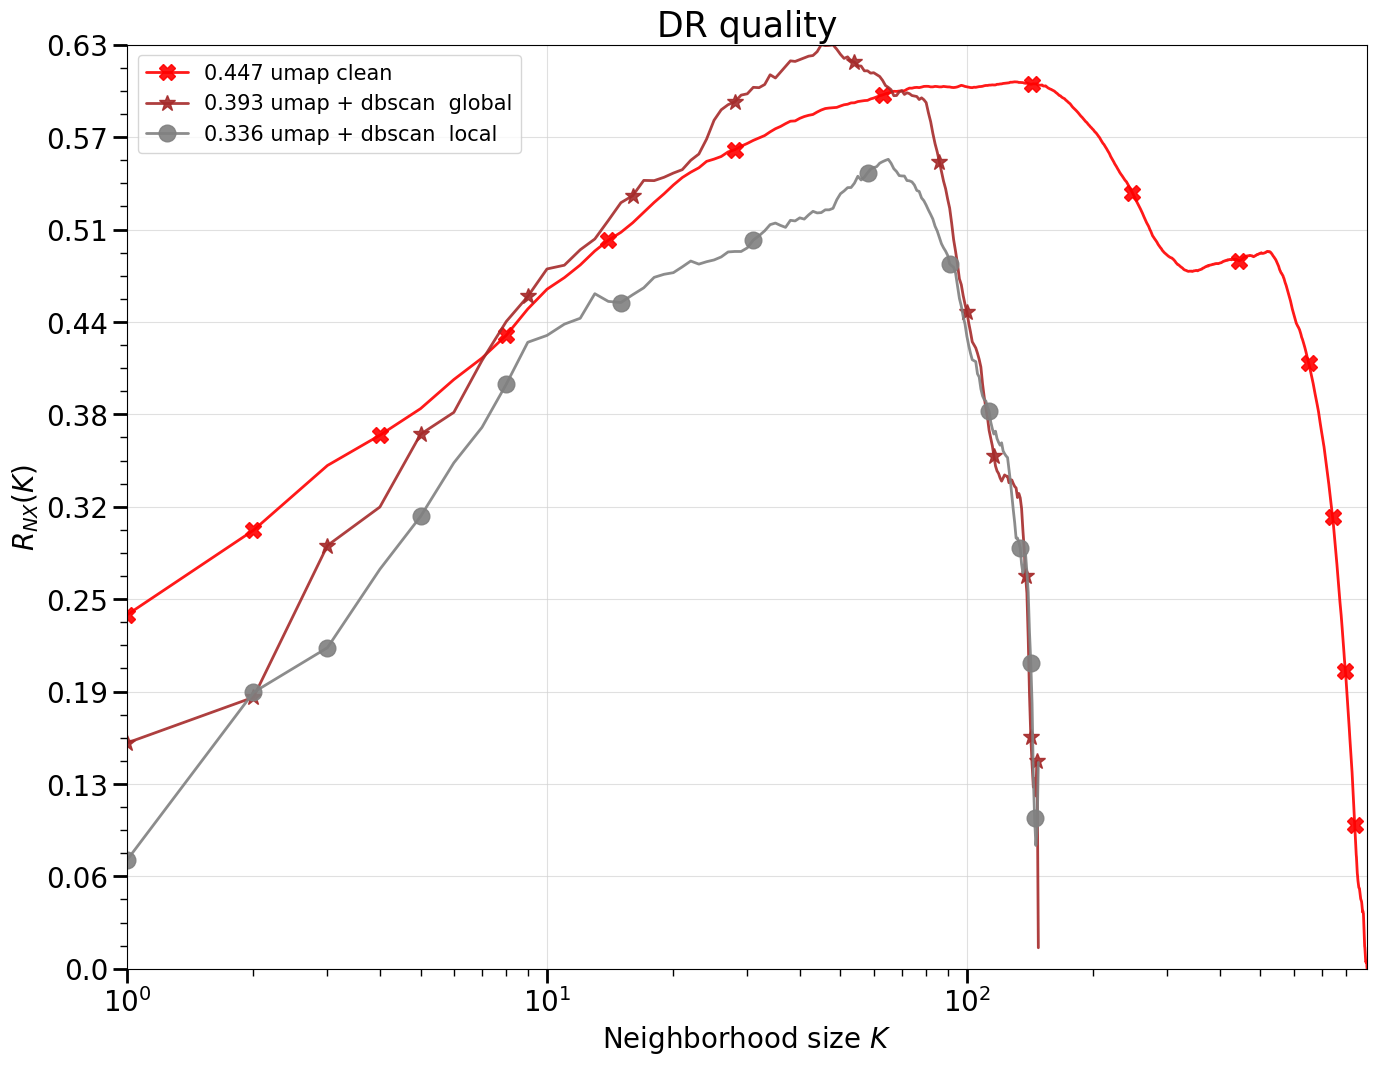

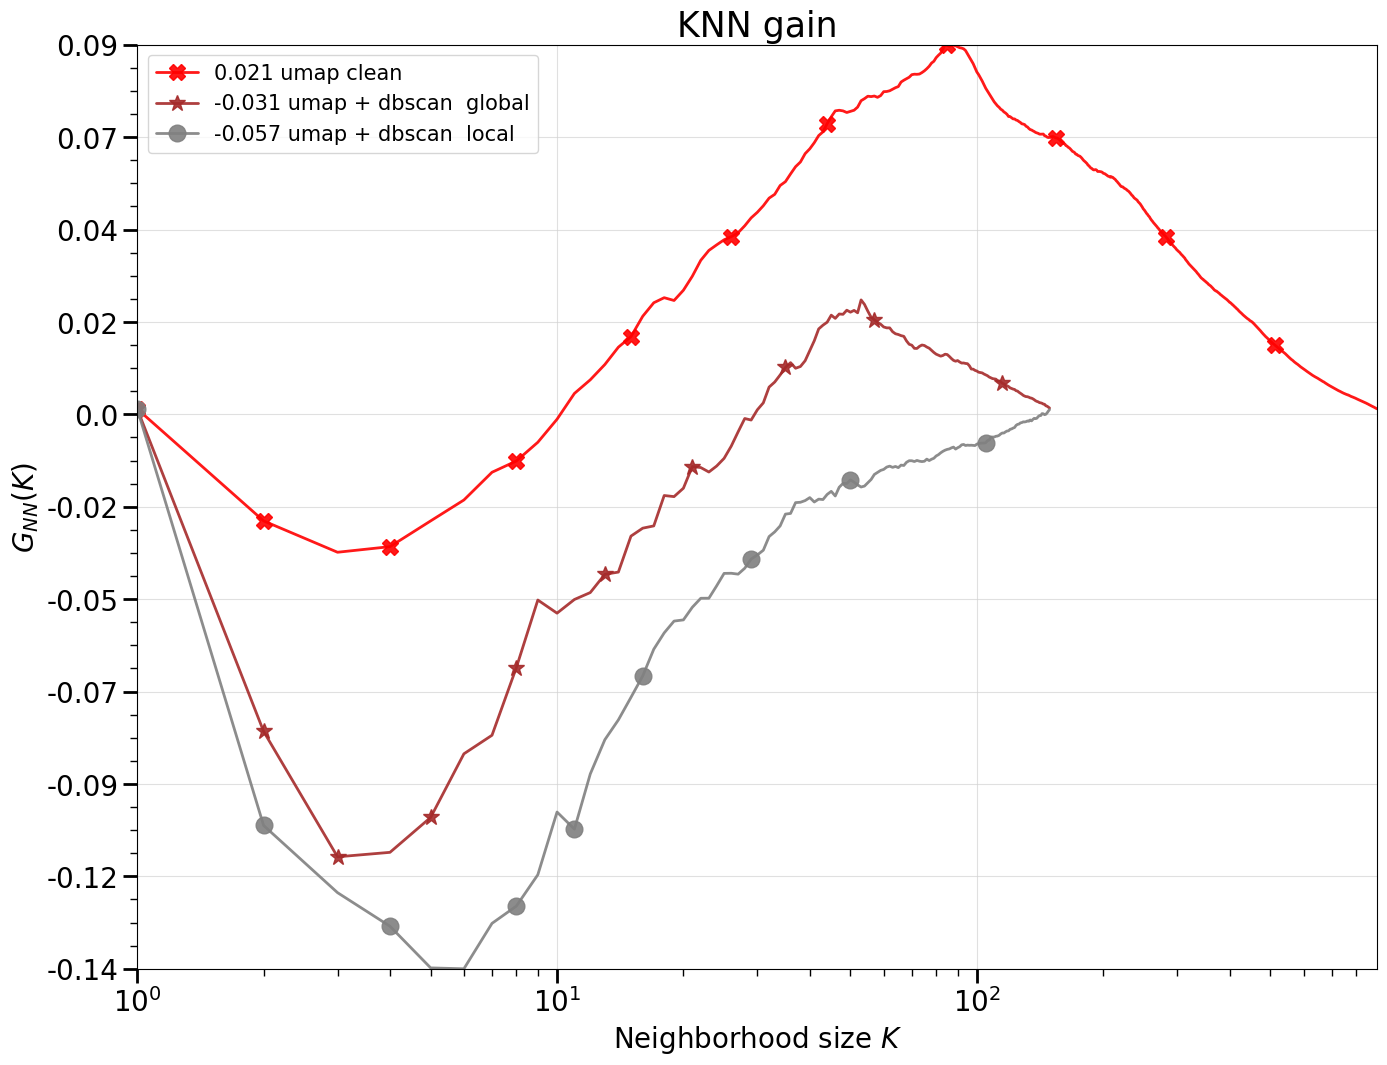

In [63]:
umap_metrics_dbscan.visualize()